# BioSound Tutorial 3.  Reading a series of BioSound h5 files and calculating some summary statistics
### This notebook illustrates how to read BioSound objects that have been saved in h5 files and perform grouped averages and simple statistics

## Step 1. Loading all the dependencies.  
### numpy, matplotlib and soundsig should have been installed when you installed soundsig.  You might have to also install pandas.

In [2]:
# Import math, pandas and soundsig libraries
import numpy as np
import pandas as pd
from soundsig.sound import BioSound 

import os


## Step 2. Specifying the location of the sound files in BioSound format (h5 files).

YOU WILL WANT TO CHANGE TO FOLLOWING CODE TO POINT TO THE RIGHT PLACE
You will also want to change the location for storing the pandas table.

In [3]:
# Go to the folder that has the h5 files corresponding to the BioSound objects.
os.chdir('/Users/tobias/Documents/BioSoundTutorial-master/BatCalls/h5files')

tableStore = '/Users/tobias/Documents/BioSoundTutorial-master/vocSelTable.h5'

## Step 3. Looping through a set of bioSoundObjects to extract some features and storing them into a Pandas Data Frame.

In [4]:
# vocSelData is going to be a list of dictionary containing the values that we are going to extract from each BioSound object.
vocSelData = []

# Looping through all the files
for fname in os.listdir('.'):
    if fname.endswith('.h5'):
        
        print(fname)
        # Allocate object and read data
        myBioSound = BioSound()
        myBioSound.readh5(fname)
        
        # Take the time average formants 
        meanF1 = np.mean(myBioSound.F1[~np.isnan(myBioSound.F1)])
        meanF2 = np.mean(myBioSound.F2[~np.isnan(myBioSound.F2)])
        meanF3 = np.mean(myBioSound.F3[~np.isnan(myBioSound.F3)])
        
        # These are our two identifier - the emitter (bird) and the call type
        Bird = np.array2string(myBioSound.emitter)[2:-1]
        #print(Bird)
        callType = np.array2string(myBioSound.type)[2:-1]
        #print(callType)

        # Get values for the fundamental
        #print(myBioSound.fund)
        #print(myBioSound.fund.size>0)
        if (myBioSound.fund is not None) and (myBioSound.fund.size>0):
            fund = np.float64(myBioSound.fund)
            cvfund = np.float64(myBioSound.cvfund)
            maxfund = np.float64(myBioSound.maxfund)
            minfund = np.float64(myBioSound.minfund)
        else:
            fund = None 
            cvfund = None  
            maxfund = None
            minfund = None
            

        vocSelData.append({"Bird": Bird, 
                     "calltype": callType, "fund": fund, 
                     "cvfund": cvfund, "maxfund": maxfund, "minfund": minfund,
                     "F1": meanF1, "F2": meanF2, "F3":meanF3,
                     "sal": np.float64(myBioSound.meansal), "rms": np.float64(myBioSound.rms), 
                     "maxAmp": np.float64(myBioSound.maxAmp),
                     "meanS": np.float64(myBioSound.meanspect), "stdS": np.float64(myBioSound.stdspect),
                     "skewS": np.float64(myBioSound.skewspect), "kurtS": np.float64(myBioSound.kurtosisspect), 
                     "entS": np.float64(myBioSound.entropyspect),
                     "q1": np.float64(myBioSound.q1), "q2": np.float64(myBioSound.q2), "q3": np.float64(myBioSound.q3),                  
                     "meanT": np.float64(myBioSound.meantime), "stdT": np.float64(myBioSound.stdtime),
                     "skewT": np.float64(myBioSound.skewtime), "kurtT": np.float64(myBioSound.kurtosistime),
                     "entT": np.float64(myBioSound.entropytime)
                    })

# Make a panda data frame with all the data                    
vocSelTable = pd.DataFrame(vocSelData)
vocSelTable.to_hdf(tableStore, 'callTable', mode = 'w')  
print('Done with the table!')


F11648_Saline_DeSa_200123_0958_voc_1_2017974.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_1_235993.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_13349003.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_13651632.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_14266469.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_4611906.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_50247258.wav_Bat11648_AL5_Elmt2_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_50247258.wav_Bat11648_AL5_Elmt3_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_56830751.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_62498847.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_64714124.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_64924562.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200123_0958_voc_2_65954481.wav_Bat11648_AL5_Elmt1

c:\users\tobias\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\tobias\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


F11648_Saline_DeSa_200124_1013_voc_10_84688158.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_10_86511637.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_10_87234346.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_10_87968576.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_10_91035886.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_10_98860949.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_11_1715110.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_11_1916716.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_11_19221494.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_11_63291802.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_11_69679008.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_11_69946472.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_18_94957271.wav_Bat

F11648_Saline_DeSa_200124_1013_voc_7_24657327.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_7_24657327.wav_Bat11648_AL5_Elmt2_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_7_24657327.wav_Bat11648_AL5_Elmt3_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_7_25690722.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_7_26278644.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_7_37538246.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_7_37538246.wav_Bat11648_AL5_Elmt3_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_7_37851024.wav_Bat11648_AL5_Elmt2_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_7_37989542.wav_Bat11648_AL5_Elmt1_Piezo.h5
F11648_Saline_DeSa_200124_1013_voc_7_7024497.wav_Bat11648_AL5_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200123_0958_voc_1_28046200.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200123_0958_voc_1_71581470.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200123_0958_voc_1_72578172.wav_Bat144

F14463_Kanamycin_DeSa_200124_1013_voc_12_19620589.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_26056925.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_29950226.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_30184665.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_30614182.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_30986753.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_32720101.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_32933996.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_33156530.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_33368505.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_33558398.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_12_33771909.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin

F14463_Kanamycin_DeSa_200124_1013_voc_24_54133586.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_25_33024920.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_25_34959450.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_25_51200564.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_25_58457656.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_25_58765476.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_25_59107439.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_25_61171117.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_26_108450325.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_26_16126886.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_26_17136547.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_26_20520362.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamyci

F14463_Kanamycin_DeSa_200124_1013_voc_32_74925907.wav_Bat14463_AL7_Elmt4_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_32_77108551.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_32_77396174.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_32_77566294.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_32_77688984.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_4_23148943.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_4_24265073.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_4_24265073.wav_Bat14463_AL7_Elmt4_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_4_24265073.wav_Bat14463_AL7_Elmt5_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_4_50082746.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_4_50216574.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200124_1013_voc_4_52751626.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_2

F14463_Kanamycin_DeSa_200127_0959_voc_15_106793126.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_106925034.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_106925034.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_106925034.wav_Bat14463_AL7_Elmt3_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_106925034.wav_Bat14463_AL7_Elmt4_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_106925034.wav_Bat14463_AL7_Elmt5_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_107512380.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_107512380.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_107734530.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_107852614.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_107974730.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_108086861.wav_Bat14463_AL7_Elmt1_Piezo.h5
F144

F14463_Kanamycin_DeSa_200127_0959_voc_15_78828059.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_78934814.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_79046561.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_79160639.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_79160639.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_79160639.wav_Bat14463_AL7_Elmt3_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_79505263.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_79636211.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_79760055.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_79877562.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_79877562.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_80106241.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin

F14463_Kanamycin_DeSa_200127_0959_voc_15_92851202.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_92975237.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_93081822.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_93244045.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_93372689.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_93619417.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_93748829.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_93876704.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_93996132.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_94130152.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_94130152.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_15_94130152.wav_Bat14463_AL7_Elmt3_Piezo.h5
F14463_Kanamycin

F14463_Kanamycin_DeSa_200127_0959_voc_16_15337650.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_15337650.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_15613947.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_1572563.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_15733387.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_15885635.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_16026183.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_16166347.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_16296335.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_1692375.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_1802202.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_1802202.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeS

F14463_Kanamycin_DeSa_200127_0959_voc_16_86790302.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_8753196.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_8888176.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_9018164.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_9140279.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_9263739.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_9382015.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_93858611.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_9500290.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_9627782.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_16_9888910.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_17_38673201.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200

F14463_Kanamycin_DeSa_200127_0959_voc_25_105790112.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_10588206.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_106022823.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_106163564.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_106335025.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_106515510.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_106703292.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_106900866.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_107116296.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_107321551.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_107504340.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_10756856.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463

F14463_Kanamycin_DeSa_200127_0959_voc_25_3205845.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_32255934.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_32677003.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_32873425.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_33088471.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_33315998.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_33449250.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_33565797.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_33740331.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_33979954.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_34460736.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_34675207.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_

F14463_Kanamycin_DeSa_200127_0959_voc_25_89059690.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_89408318.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_89658748.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_89872066.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_90085192.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_90275662.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_90422739.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_90664474.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_90907553.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_91140264.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_91339566.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_25_91567093.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin

F14463_Kanamycin_DeSa_200127_0959_voc_26_24242899.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_24451993.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_24451993.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_24930279.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_25166062.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_25421622.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_2565447.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_25915077.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_26153932.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_26285583.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_26751646.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_26984675.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_

F14463_Kanamycin_DeSa_200127_0959_voc_26_72765445.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_73159633.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_73326102.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_73326102.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_73544796.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_73908263.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_74399030.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_7464090.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_74873668.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_76735663.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_7676833.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_26_77400605.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_D

F14463_Kanamycin_DeSa_200127_0959_voc_29_88562792.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_29_89008980.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_29_89499170.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_29_9421046.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_29_9632445.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_29_9864580.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_29_99100803.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_29_99325066.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_29_99530320.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_2_104239113.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_2_20482607.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_2_27115447.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa

F14463_Kanamycin_DeSa_200127_0959_voc_30_7478614.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_7772627.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_7986713.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_80800679.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_81000175.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_8179243.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_8179243.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_82828843.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_84647907.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_85827583.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_95536933.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_30_95750251.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa

F14463_Kanamycin_DeSa_200127_0959_voc_6_45014419.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_53705063.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_54872188.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_56483772.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_63010160.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_92325218.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_92325218.wav_Bat14463_AL7_Elmt3_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_95814417.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_97651843.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_97864391.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_98005133.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200127_0959_voc_6_98005133.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200127

F14463_Kanamycin_DeSa_200128_1051_voc_21_110483543.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_21_110483543.wav_Bat14463_AL7_Elmt3_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_21_110902499.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_21_111772232.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_21_111772232.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_21_28253820.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_21_28434881.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_22_13923012.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_22_15758868.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_22_22119161.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_22_22119161.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_22_22119161.wav_Bat14463_AL7_Elmt3_Piezo.h5
F14463_Kana

F14463_Kanamycin_DeSa_200128_1051_voc_8_107213839.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_8_27281660.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_8_27577276.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_8_60171282.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_8_60171282.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_9_110751223.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_9_111560895.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_9_28358668.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_9_28358668.wav_Bat14463_AL7_Elmt2_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_9_29363166.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_9_33351585.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200128_1051_voc_9_36943244.wav_Bat14463_AL7_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200

F14463_Kanamycin_DeSa_200129_1104_voc_5_93256154.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_5_93411103.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_5_93587556.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_6_23334240.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_6_24559307.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_6_24714954.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_6_29352299.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_6_29678180.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_6_32566139.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_6_32792473.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_6_33121419.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin_DeSa_200129_1104_voc_6_33519028.wav_Bat14463_AL46_Elmt1_Piezo.h5
F14463_Kanamycin

F65696_Saline_DeSa_200124_1013_voc_1_93773811.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_1_93773811.wav_Bat65696_AL46_Elmt2_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_1_94361500.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_1_96117809.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_1_96588415.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_1_96588415.wav_Bat65696_AL46_Elmt2_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_22_57615715.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_23_46786119.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_23_46786119.wav_Bat65696_AL46_Elmt2_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_23_64207578.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_23_67769095.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_23_79811693.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200124_1013_voc_23_82497466

F65696_Saline_DeSa_200127_0959_voc_6_45014419.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200127_0959_voc_6_45014419.wav_Bat65696_AL46_Elmt2_Piezo.h5
F65696_Saline_DeSa_200127_0959_voc_9_100698568.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200127_0959_voc_9_94742549.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_10_21102514.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_10_56159113.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_10_56522580.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_10_56867422.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_10_57408110.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_10_57810170.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_10_58410764.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_10_58818008.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_10_62801

F65696_Saline_DeSa_200128_1051_voc_21_24609122.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_3330147.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_3330147.wav_Bat65696_AL46_Elmt2_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_42021730.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_42140773.wav_Bat65696_AL46_Elmt2_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_42140773.wav_Bat65696_AL46_Elmt3_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_42450622.wav_Bat65696_AL46_Elmt2_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_42590259.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_42745853.wav_Bat65696_AL46_Elmt2_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_42745853.wav_Bat65696_AL46_Elmt3_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_42903682.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_42903682.wav_Bat65696_AL46_Elmt2_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_21_4299

F65696_Saline_DeSa_200128_1051_voc_27_50277235.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_50985544.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_51436757.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_52213805.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_54579424.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_55129412.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_55678357.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_56063520.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_56549103.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_57041106.wav_Bat65696_AL46_Elmt1_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_57041106.wav_Bat65696_AL46_Elmt2_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_57041106.wav_Bat65696_AL46_Elmt3_Piezo.h5
F65696_Saline_DeSa_200128_1051_voc_27_57

F71047_Kanamycin_DeSa_200123_1413_voc_2_85070911.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_2_97501257.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_3_102551546.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_3_14284972.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_3_31262888.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_3_33574445.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_3_34068284.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_3_34068284.wav_Bat71047_AL3_Elmt2_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_3_35891186.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_3_36308223.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_3_37047637.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200123_1413_voc_3_38266681.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_20012

F71047_Kanamycin_DeSa_200124_1013_voc_11_9382751.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_11_9667879.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_13_57846045.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_14_111415411.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_15_39167232.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_16_36526333.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_16_36977547.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_16_46292914.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_1_10196415.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_1_1673279.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_1_2710152.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200124_1013_voc_1_2710152.wav_Bat71047_AL3_Elmt2_Piezo.h5
F71047_Kanamycin_DeSa_20

F71047_Kanamycin_DeSa_200127_0959_voc_5_77681759.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200127_0959_voc_6_34506835.wav_Bat71047_AL3_Elmt2_Piezo.h5
F71047_Kanamycin_DeSa_200127_0959_voc_6_40453445.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200127_0959_voc_6_78989597.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200127_0959_voc_6_79211347.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200128_1051_voc_13_88323079.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200128_1051_voc_13_89052445.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200128_1051_voc_13_89052445.wav_Bat71047_AL3_Elmt2_Piezo.h5
F71047_Kanamycin_DeSa_200128_1051_voc_13_91117466.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200128_1051_voc_13_92157434.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa_200128_1051_voc_13_92157434.wav_Bat71047_AL3_Elmt2_Piezo.h5
F71047_Kanamycin_DeSa_200128_1051_voc_13_95699364.wav_Bat71047_AL3_Elmt1_Piezo.h5
F71047_Kanamycin_DeSa

F71353_Saline_DeSa_200123_0958_voc_3_29348631.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_0958_voc_3_36970854.wav_Bat71353_AL11_Elmt2_Piezo.h5
F71353_Saline_DeSa_200123_0958_voc_3_79873775.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_0958_voc_3_91626112.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_0958_voc_3_92226633.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_1413_voc_2_45735132.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_1413_voc_3_99287964.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_1413_voc_5_2512169.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_1413_voc_6_22941359.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_1413_voc_7_50996626.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_1413_voc_7_56811215.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_1413_voc_7_87227805.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200123_1413_voc_8_26543221.wav_Bat

F71353_Saline_DeSa_200124_1013_voc_8_40520060.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_45499746.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_45499746.wav_Bat71353_AL11_Elmt2_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_45750892.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_45750892.wav_Bat71353_AL11_Elmt2_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_46018546.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_46149685.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_46546371.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_46665033.wav_Bat71353_AL11_Elmt2_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_53018718.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_56321418.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_8_60501042.wav_Bat71353_AL11_Elmt2_Piezo.h5
F71353_Saline_DeSa_200124_1013_voc_9_68367535.wav_Ba

F71353_Saline_DeSa_200129_1104_voc_8_52747903.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200129_1104_voc_8_7482369.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71353_Saline_DeSa_200129_1104_voc_8_83782495.wav_Bat71353_AL11_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200123_0958_voc_2_103501665.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200123_0958_voc_2_69257494.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200123_0958_voc_2_69607090.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200123_0958_voc_2_71113403.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200123_0958_voc_2_85598479.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200123_1413_voc_1_105576244.wav_Bat71354_AL9_Elmt4_Piezo.h5
F71354_Kanamycin_DeSa_200123_1413_voc_1_106746740.wav_Bat71354_AL9_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200123_1413_voc_1_57292404.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200123_1413_voc_1_95309920.wav_Bat71354_AL9_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_2001

F71354_Kanamycin_DeSa_200124_1013_voc_30_47121279.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_47633549.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_47823250.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_48055962.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_48200545.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_48360870.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_49325506.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_49428804.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_49658635.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_49948754.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_50331614.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200124_1013_voc_30_50331614.wav_Bat71354_AL39_Elmt2_Piezo.h5
F713

F71354_Kanamycin_DeSa_200128_1051_voc_9_77824336.wav_Bat71354_AL39_Elmt2_Piezo.h5
F71354_Kanamycin_DeSa_200128_1051_voc_9_8292046.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200128_1051_voc_9_8292046.wav_Bat71354_AL39_Elmt2_Piezo.h5
F71354_Kanamycin_DeSa_200128_1051_voc_9_8292046.wav_Bat71354_AL39_Elmt3_Piezo.h5
F71354_Kanamycin_DeSa_200128_1051_voc_9_8292046.wav_Bat71354_AL39_Elmt4_Piezo.h5
F71354_Kanamycin_DeSa_200128_1051_voc_9_8292046.wav_Bat71354_AL39_Elmt6_Piezo.h5
F71354_Kanamycin_DeSa_200128_1051_voc_9_8292046.wav_Bat71354_AL39_Elmt7_Piezo.h5
F71354_Kanamycin_DeSa_200129_1104_voc_1_2084596.wav_Bat71354_AL39_Elmt2_Piezo.h5
F71354_Kanamycin_DeSa_200129_1104_voc_1_22367136.wav_Bat71354_AL39_Elmt2_Piezo.h5
F71354_Kanamycin_DeSa_200129_1104_voc_1_22991333.wav_Bat71354_AL39_Elmt1_Piezo.h5
F71354_Kanamycin_DeSa_200129_1104_voc_1_22991333.wav_Bat71354_AL39_Elmt3_Piezo.h5
F71354_Kanamycin_DeSa_200129_1104_voc_1_27322597.wav_Bat71354_AL39_Elmt2_Piezo.h5
F71354_Kanamycin_DeSa_2

M14461_Saline_DeSa_200123_1413_voc_6_81667178.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200123_1413_voc_6_8256245.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200123_1413_voc_6_84841803.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200123_1413_voc_6_97843369.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200123_1413_voc_7_10922161.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200123_1413_voc_7_10922161.wav_Bat14461_AL16_Elmt2_Piezo.h5
M14461_Saline_DeSa_200123_1413_voc_7_7335300.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200123_1413_voc_7_9391683.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200123_1413_voc_7_9391683.wav_Bat14461_AL16_Elmt2_Piezo.h5
M14461_Saline_DeSa_200123_1413_voc_8_70573626.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200123_1413_voc_8_96720252.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_10_80937021.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_10_80937021.wav_Bat1

M14461_Saline_DeSa_200124_1013_voc_27_67619944.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_28_107199340.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_28_211469.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_28_27039095.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_28_56183464.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_28_56287915.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_28_92255017.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_28_95178689.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_29_100128751.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_29_104994370.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_29_10618454.wav_Bat14461_AL16_Elmt2_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_29_111054073.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200124_1013_voc_29_

M14461_Saline_DeSa_200127_0959_voc_27_4810042.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_27_72417390.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_3_53150742.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_3_55261601.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_3_66203661.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_3_66203661.wav_Bat14461_AL16_Elmt2_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_4_106930154.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_4_108055969.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_4_108353493.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_4_114517839.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_4_61126213.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_4_61245064.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200127_0959_voc_4_62533423.w

M14461_Saline_DeSa_200129_1104_voc_14_52040058.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_14_52423110.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_14_52670797.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_14_52670797.wav_Bat14461_AL16_Elmt2_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_14_52670797.wav_Bat14461_AL16_Elmt3_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_14_54981011.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_15_102222432.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_15_97109301.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_15_97109301.wav_Bat14461_AL16_Elmt2_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_15_97639252.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_16_19088269.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_16_19599422.wav_Bat14461_AL16_Elmt1_Piezo.h5
M14461_Saline_DeSa_200129_1104_voc_16_5

M14464_Saline_DeSa_200127_0959_voc_14_41737143.wav_Bat14464_AL15_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_41737143.wav_Bat14464_AL15_Elmt2_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_41737143.wav_Bat14464_AL15_Elmt3_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_41737143.wav_Bat14464_AL15_Elmt4_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_42201974.wav_Bat14464_AL15_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_42201974.wav_Bat14464_AL15_Elmt2_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_42201974.wav_Bat14464_AL15_Elmt3_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_42201974.wav_Bat14464_AL15_Elmt4_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_42201974.wav_Bat14464_AL15_Elmt5_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_42201974.wav_Bat14464_AL15_Elmt6_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_42201974.wav_Bat14464_AL15_Elmt7_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_43039710.wav_Bat14464_AL15_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_14_43

M14464_Saline_DeSa_200127_0959_voc_3_54806092.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_3_60255095.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_3_62585589.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_3_62717185.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_3_62717185.wav_Bat14464_AL5_Elmt2_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_3_71332869.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_3_71332869.wav_Bat14464_AL5_Elmt2_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_3_75503043.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_3_95154381.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_3_95396954.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_3_98851068.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_4_65766225.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200127_0959_voc_5_14577976.wav_Bat14464_AL5_E

M14464_Saline_DeSa_200128_1051_voc_23_50915617.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_23_65201228.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_23_78473049.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_23_83235943.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_23_83590231.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_23_83590231.wav_Bat14464_AL5_Elmt2_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_23_92976395.wav_Bat14464_AL15_Elmt1_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_23_93287636.wav_Bat14464_AL15_Elmt1_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_23_98344491.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_23_99056449.wav_Bat14464_AL15_Elmt1_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_24_25992045.wav_Bat14464_AL5_Elmt1_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_24_25992045.wav_Bat14464_AL5_Elmt2_Piezo.h5
M14464_Saline_DeSa_200128_1051_voc_25_101540670.w

M71043_Kanamycin_DeSa_200128_1051_voc_12_12126226.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_13_108689295.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_13_92468099.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_14_34021124.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_14_97865626.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_14_97865626.wav_Bat71043_AL10_Elmt2_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_15_39165639.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_17_92933315.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_1_109002901.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_20_111881223.wav_Bat71043_AL10_Elmt2_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_22_17100155.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_22_407715.wav_Bat71043_AL10_Elmt1_Piezo.h5
M710

M71043_Kanamycin_DeSa_200128_1051_voc_9_12272538.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_9_12537316.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_9_20492129.wav_Bat71043_AL10_Elmt2_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_9_5184088.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_9_5556339.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_9_5784827.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_9_5784827.wav_Bat71043_AL10_Elmt2_Piezo.h5
M71043_Kanamycin_DeSa_200128_1051_voc_9_5784827.wav_Bat71043_AL10_Elmt3_Piezo.h5
M71043_Kanamycin_DeSa_200129_1104_voc_10_18087794.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200129_1104_voc_12_24647604.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200129_1104_voc_16_47652797.wav_Bat71043_AL10_Elmt1_Piezo.h5
M71043_Kanamycin_DeSa_200129_1104_voc_16_47652797.wav_Bat71043_AL10_Elmt2_Piezo.h5
M71043_Kanamycin_

M71351_Kanamycin_DeSa_200124_1013_voc_7_10977957.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200124_1013_voc_7_57514780.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_10_25964507.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_10_26388840.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_10_26581643.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_10_26786129.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_10_27414949.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_10_27588330.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_10_27991372.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_10_28105232.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_10_28371137.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_10_28736908.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351

M71351_Kanamycin_DeSa_200127_0959_voc_1_21282679.wav_Bat71351_AL49_Elmt2_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_21537328.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_21537328.wav_Bat71351_AL49_Elmt2_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_21537328.wav_Bat71351_AL49_Elmt3_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_26616530.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_27277726.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_28344460.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_28907266.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_29247656.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_29247656.wav_Bat71351_AL49_Elmt2_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_29395483.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_1_29513008.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin

M71351_Kanamycin_DeSa_200127_0959_voc_5_38378284.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_38378284.wav_Bat71351_AL49_Elmt2_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_38378284.wav_Bat71351_AL49_Elmt3_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_62341789.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_65394155.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_65847815.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_66191697.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_66191697.wav_Bat71351_AL49_Elmt3_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_66490266.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_70935200.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_70935200.wav_Bat71351_AL49_Elmt2_Piezo.h5
M71351_Kanamycin_DeSa_200127_0959_voc_5_72948188.wav_Bat71351_AL49_Elmt1_Piezo.h5
M71351_Kanamycin

## Step 4. Calculate some summary statistics

In [5]:
vocSelTableGrouped = vocSelTable.groupby(['Bird'])
vocSelTableGroupedAgg = vocSelTableGrouped.aggregate('mean').reset_index()

vocSelTableGroupedAgg


,Bird,fund,cvfund,maxfund,minfund,F1,F2,F3,sal,rms,...,kurtS,entS,q1,q2,q3,meanT,stdT,skewT,kurtT,entT
0,F11648,1345.608046,0.148317,1718.823607,1106.014913,4364.757191,9472.312487,14756.088780,0.432794,4789.799484,...,15.783280,0.699875,796.851886,1479.578865,2401.823687,0.230653,0.130656,0.053579,2.277608,0.931045
1,F14463,868.281893,0.099885,1018.315018,765.810405,6154.185119,10301.991598,15363.644364,0.468565,7204.111186,...,17.619391,0.680014,898.120519,1266.947636,1924.770384,0.109648,0.061440,-0.031315,2.046276,0.972182
2,F65696,917.837443,0.121601,1075.801949,768.977500,5348.593382,12444.765735,16050.387742,0.340164,3815.297633,...,17.634977,0.718947,892.041301,1374.040570,2284.832633,0.174086,0.101318,0.098918,2.213435,0.938827
3,F71047,1390.821874,0.236007,1906.435604,1021.895519,4475.741367,9318.660181,13890.216223,0.411704,4513.745086,...,14.572077,0.739085,1198.904855,1806.640625,2864.438012,0.286903,0.161272,0.131083,2.314522,0.940044
4,F71353,1388.442800,0.206359,1773.632368,1047.019648,3999.344844,8743.266549,13728.465460,0.370386,4136.255786,...,12.638978,0.754413,1293.298750,1901.569158,2605.218022,0.210649,0.137234,0.320673,2.431441,0.934704
5,F71354,1544.986346,0.234137,2078.387604,1126.264099,5014.417690,10206.276723,15150.400346,0.380832,3780.948162,...,15.806661,0.718737,809.368269,1408.758809,2472.510806,0.372101,0.213449,0.072302,2.193779,0.933540
6,M14461,1126.328727,0.095414,1361.010351,991.807445,4714.345224,9936.047781,14732.892318,0.578426,5988.829603,...,18.494238,0.633724,999.581473,1615.015147,2110.670440,0.097530,0.057790,0.036503,2.156693,0.936488
7,M14464,1522.066303,0.127546,1818.742851,1312.522847,4130.177802,8758.814891,13599.166467,0.477182,5979.603538,...,14.733841,0.709727,1161.431991,1812.426617,2907.954751,0.204710,0.119394,0.099575,2.163013,0.945918
8,M71043,1633.745224,0.252467,2241.320706,1121.309442,4220.261188,8746.972589,13801.569554,0.593337,7247.969692,...,33.071040,0.598298,1306.564413,1679.653906,2201.979197,0.212738,0.116037,-0.013269,2.187181,0.947455
9,M71351,1405.994993,0.132048,1683.005926,1089.261029,5156.700934,11342.412318,15012.486762,0.551229,6582.186728,...,25.819145,0.622729,1285.933463,1749.359052,2577.166101,0.170682,0.098086,-0.032048,2.076800,0.955323


## Step 5. You can perform classical hypothesis testing at this point.  

For example, is the fundamental different for the four birds?  That is simple a one-way-anova.  I like to use
the statistical modeling approach with R like syntax.  Here 'lm' is the same as ordinary least square or 'ols'



In [6]:
# One way anova

import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('fund ~ calltype | (Bird)',
                data=vocSelTable).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

PatsyError: Error evaluating factor: TypeError: unsupported operand type(s) for |: 'str' and 'str'
    fund ~ calltype | (Bird)
           ^^^^^^^^^^^^^^^^^

The mean fundamental is clearly different for these four birds and you also see this in a boxplot

<AxesSubplot:title={'center':'rms'}, xlabel='calltype'>

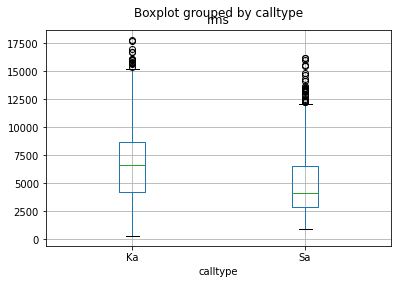

In [46]:
vocSelTable.boxplot('rms', 'calltype')